In [5]:
from sklearn.datasets import make_blobs
import numpy as np

X, _ = make_blobs(n_features=2, centers=1, cluster_std=[1], random_state=0, n_samples=100)
test_normal = X[:4]
train = X[4:]
test_anomaly = np.array([[0, 0], [-2.5, 2], [5, 4], [-2, 7]])

In [6]:
import pandas as pd
test_anomaly

array([[ 0. ,  0. ],
       [-2.5,  2. ],
       [ 5. ,  4. ],
       [-2. ,  7. ]])

In [18]:
pd.DataFrame(np.vstack( ( test_anomaly, test_normal, train) ), columns = ['a', 'b'])

,a,b
0,0.000000,0.000000
1,-2.500000,2.000000
2,5.000000,4.000000
3,-2.000000,7.000000
4,0.115044,6.213852
5,0.088484,2.322991
6,-0.514988,4.743179
7,1.372277,3.210726
8,-0.128113,4.355952
9,0.936987,3.135694


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


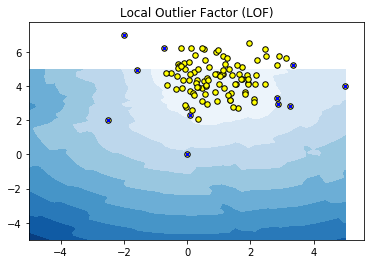

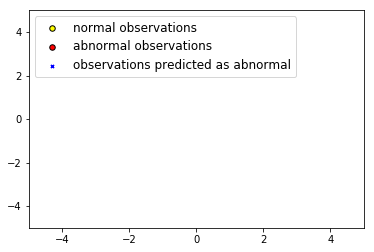

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]
X = np.vstack( ( test_anomaly, test_normal, train) )

# fit the model
clf = LocalOutlierFactor(n_neighbors=10)
y_pred = clf.fit_predict(X)
# 正常を1、異常を-1と出力するようです
ANOMALY_DATA = -1
predicted_outlier_index = np.where(y_pred == ANOMALY_DATA)
predicted_outlier = X[predicted_outlier_index]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='yellow',
                edgecolor='k', s=30, marker='o')
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=30, marker='o')
c = plt.scatter(predicted_outlier[:, 0], predicted_outlier[:, 1], c='blue',
                edgecolor='k', s=10, marker='x')
plt.figure()
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b, c],
           ["normal observations",
            "abnormal observations",
            "observations predicted as abnormal"],
           loc="upper left", prop={'size': 12})
plt.show()

In [22]:
predicted_outlier

array([[ 0.        ,  0.        ],
       [-2.5       ,  2.        ],
       [ 5.        ,  4.        ],
       [-2.        ,  7.        ],
       [ 0.08848433,  2.32299086],
       [ 3.2460247 ,  2.84942165],
       [ 2.84382807,  3.32650945],
       [-1.57671974,  4.95740592],
       [-0.73000011,  6.25456272],
       [ 2.85942078,  2.95602827],
       [ 3.35941485,  5.24826681]])

In [23]:
X[:10]

array([[ 0.        ,  0.        ],
       [-2.5       ,  2.        ],
       [ 5.        ,  4.        ],
       [-2.        ,  7.        ],
       [ 0.11504439,  6.21385228],
       [ 0.08848433,  2.32299086],
       [-0.51498751,  4.74317903],
       [ 1.37227679,  3.21072582],
       [-0.12811326,  4.35595241],
       [ 0.93698726,  3.13569383]])